In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df = pd.read_csv('smartphone_cleaned.csv')

In [8]:
df.shape

(980, 25)

In [9]:
df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1          100.0            12   
1            5000.0                        1           33.0             6   
2            5000.0                        1           15.0             4   
3            5000.0                        1            NaN             6   
4            5000.0                        1           67.0             6   

   internal_memory  screen_size  refresh_rate   resolution  num_rear_cameras  \
0              256         6.70           120  1440 X 3216                 3   
1              128         6.59           120  1080 X 2412                 3   
2               64         6.60            90  1080 X 2408                 3   
3              128         6.55           120  1080 X 2400                 3   
4              128         6.70           120  1080 X 2412                 3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [11]:
# Missing Values
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

## Univariate Analysis on the column Brand Name

In [13]:
# brand_name
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

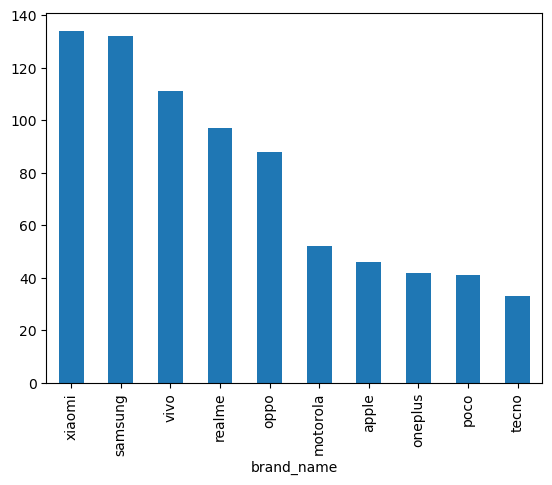

In [14]:
# plot a graph of top 10 brands
df['brand_name'].value_counts().head(10).plot(kind='bar') 

<Axes: ylabel='count'>

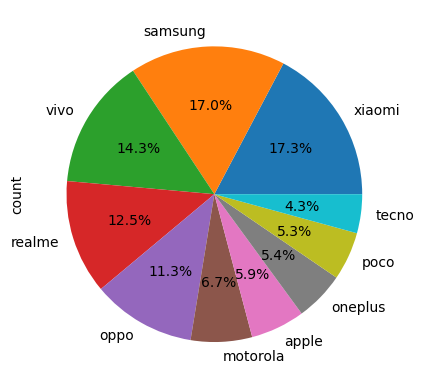

In [15]:
# pie chart
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%') 

In [16]:
df['brand_name'].isnull().sum()

0

### Observations
- There are no missing values in brand names column
- 60 % market share is taken by xiaomi, samsung, vivo, realme and oppo
- All other brands have a very small contribution. 

In [18]:
# model - supporting column
df['model'].nunique()

980

## Univariate Analysis on price column

In [20]:
# price
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

In [21]:
# The distribution is not normal, data is skewed
# Most of the phones have very less price
# Less number of phones have higher range of prices
# Definitely there are outliers
# There are no missing values

In [22]:
df['price'].isnull().sum()

0

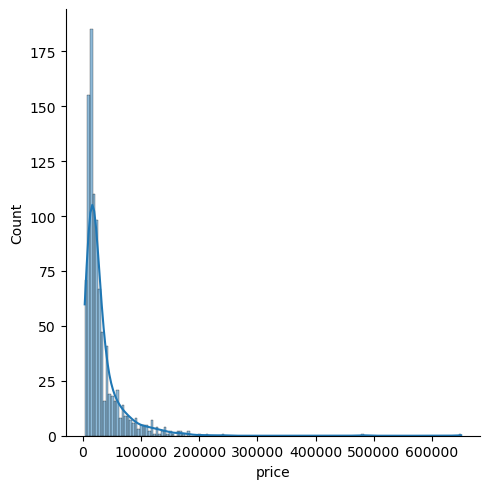

In [23]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [24]:
df['price'].skew()

6.591790999665567

<Axes: xlabel='price'>

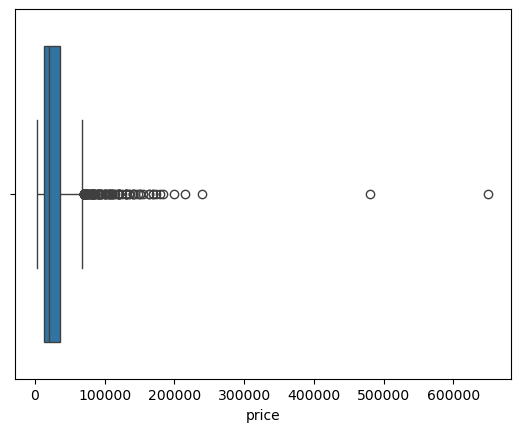

In [25]:
sns.boxplot(df['price'],orient="h")

In [26]:
# Outliers
df[df['price'] > 200000]

brand_name                                   model   price  rating  \
427      vertu                   Vertu Signature Touch  650000    62.0   
478     huawei        Huawei Mate 50 RS Porsche Design  239999    81.0   
887     xiaomi  Xiaomi Redmi K20 Pro Signature Edition  480000    88.0   
951     huawei        Huawei Mate 30 RS Porsche Design  214990     NaN   

     has_5g  has_nfc  has_ir_blaster processor_brand  num_cores  \
427   False     True           False      snapdragon        8.0   
478   False     True            True      snapdragon        8.0   
887   False     True           False      snapdragon        8.0   
951    True     True            True           kirin        8.0   

     processor_speed  battery_capacity  fast_charging_available  \
427             1.50            2275.0                        0   
478             3.20            4700.0                        1   
887             2.80            4000.0                        1   
951             2.86            4500.0                        1   

     fast_charging  ram_capacity  internal_memory  screen_size  refresh_rate  \
427            NaN             2               64         4.70            60   
478           66.0            12              512         6.74           120   
887           27.0             8              256         6.39            60   
951            NaN            12              512         6.53            60   

      resolution  num_rear_cameras  num_front_cameras       os  \
427  1080 X 1920                 1                1.0  android   
478  1212 X 2616                 3                1.0    other   
887  1080 X 2340                 3                1.0  android   
951  1176 X 2400                 4                2.0  android   

     primary_camera_rear  primary_camera_front  extended_memory_available  \
427                 13.0                   2.1                          0   
478                 50.0                  13.0                          1   
887                 48.0                  20.0                          0   
951                 40.0                  32.0                          1   

     extended_upto  
427            NaN  
478          256.0  
887            NaN  
951          256.0

## Univariate Analysis on rating column

In [28]:
# rating
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

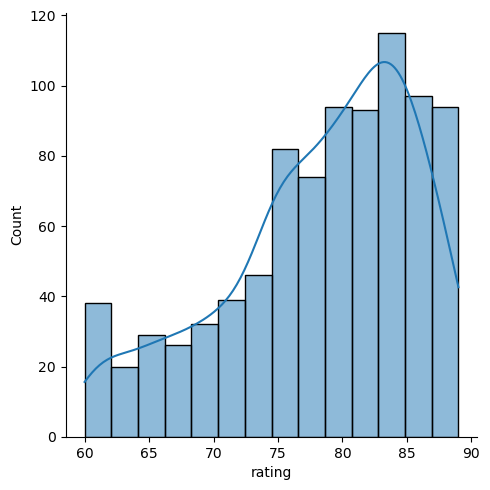

In [29]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [30]:
df['rating'].skew()

-0.6989993034105535

<Axes: xlabel='rating'>

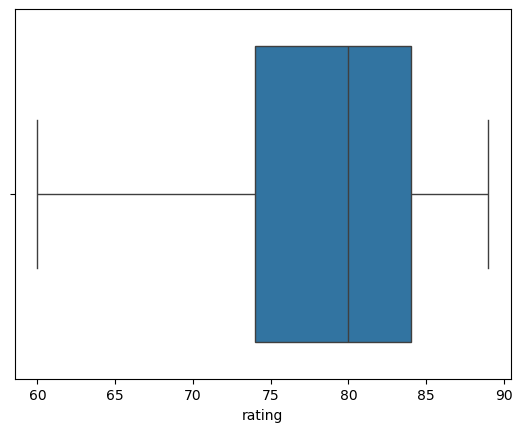

In [31]:
sns.boxplot(df['rating'],orient="h")

In [32]:
df['rating'].isnull().sum()

101

## Observations
- There are lot of missing values
- The distribution is near to normal

## Univariate Analysis on Categorical Columns 

<Axes: ylabel='count'>

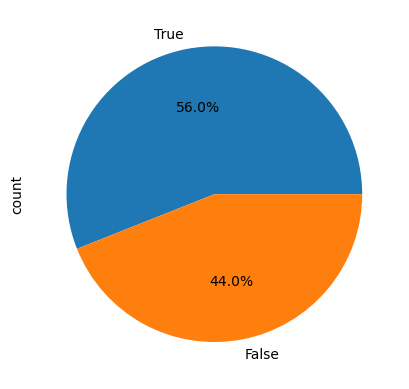

In [35]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

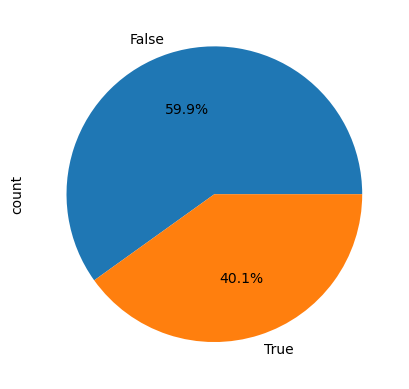

In [36]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

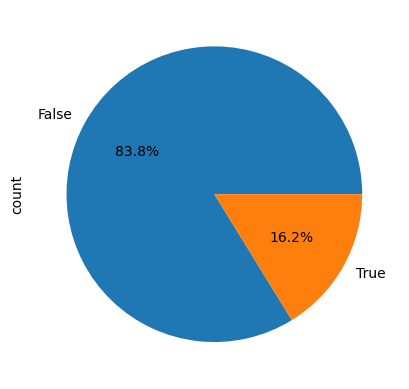

In [37]:
# ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [38]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

## Observations
- Approximately 50% phones have 5G enabled
- 40 % phones have nfc
- 16% phones have ir blaster, mostly chinese phones provide this ir blaster feature

In [40]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

<Axes: ylabel='count'>

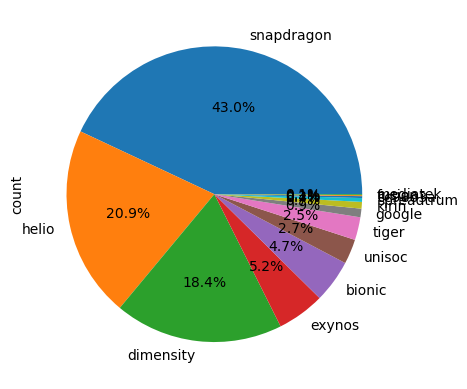

In [41]:
df['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [42]:
# Snapdragon is the most common processor brand

<Axes: ylabel='count'>

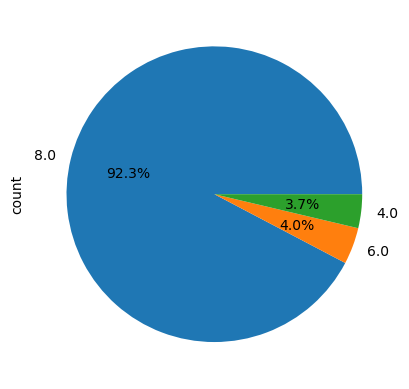

In [43]:
df['num_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [44]:
# Almost all the phones have Octa core processors
# This column won't contribute much in analysis as most of the values are same

<Axes: ylabel='count'>

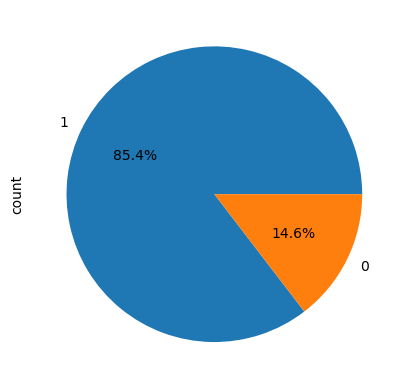

In [45]:
df['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

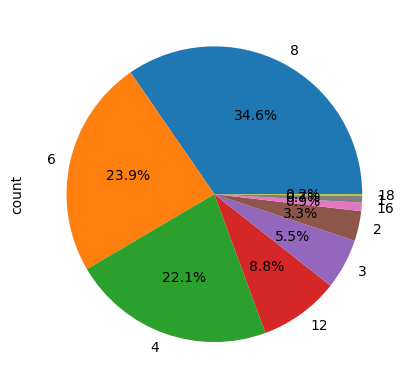

In [46]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

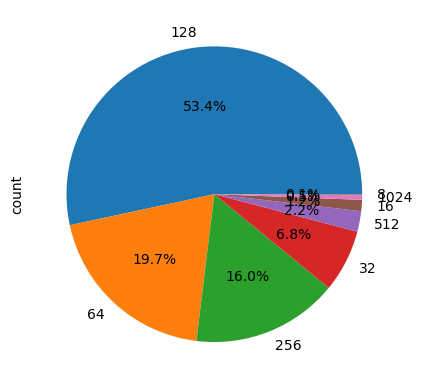

In [47]:
df['internal_memory'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

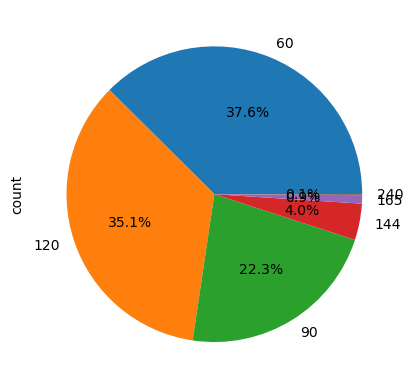

In [48]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [49]:
df['refresh_rate'].value_counts()
# Higher refresh rates are catching up

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

<Axes: ylabel='count'>

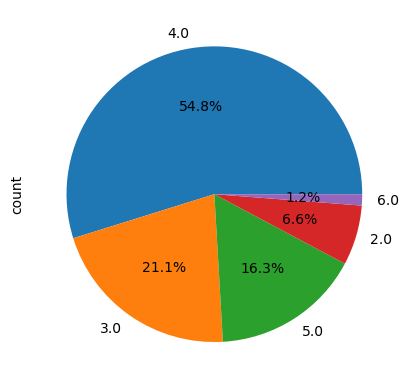

In [50]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

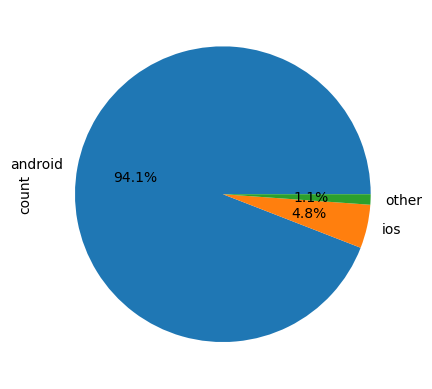

In [51]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [52]:
# Android has completely captured the market

<Axes: xlabel='extended_memory_available'>

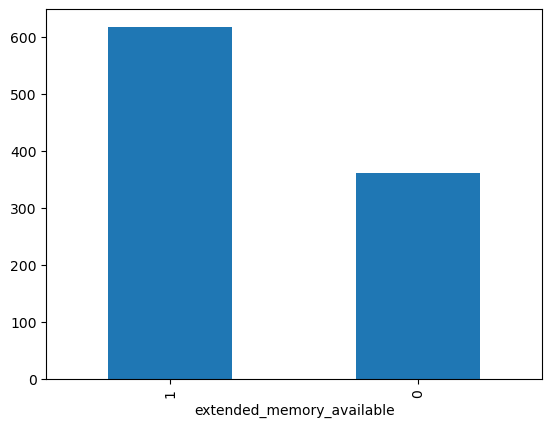

In [53]:
df['extended_memory_available'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

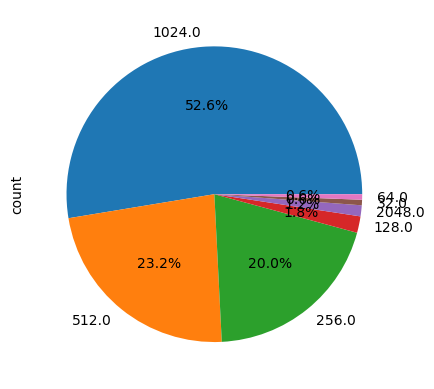

In [54]:
df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [55]:
# Distribution of numerical columns

In [56]:
def plot_graphs(column_name):
    sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
    sns.catplot(kind ='box', data=df,x=column_name)

In [57]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

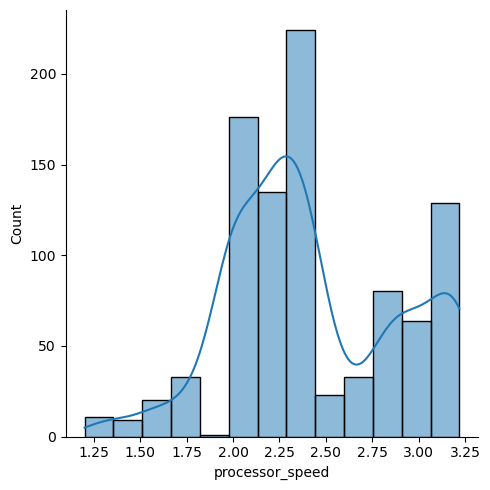

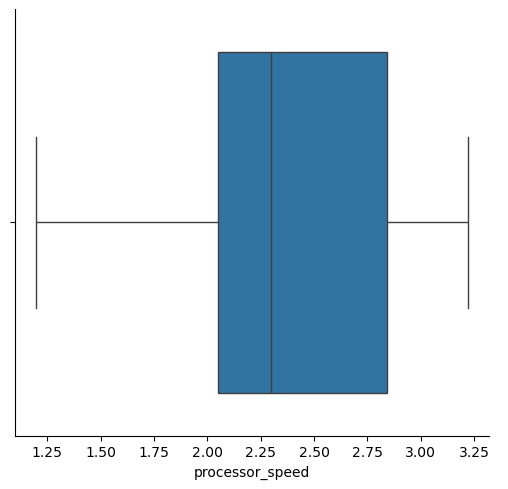

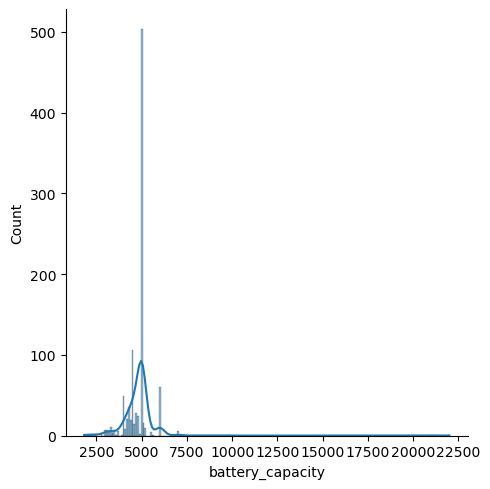

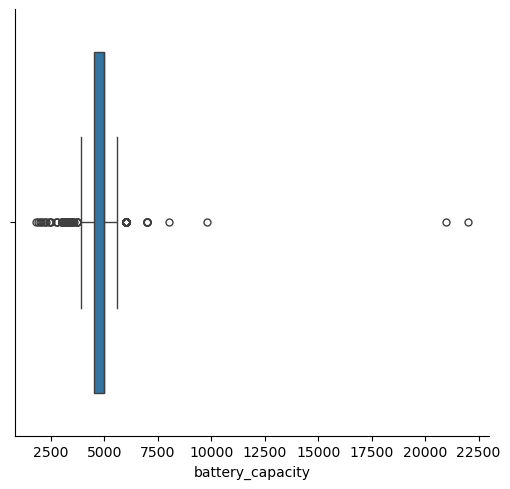

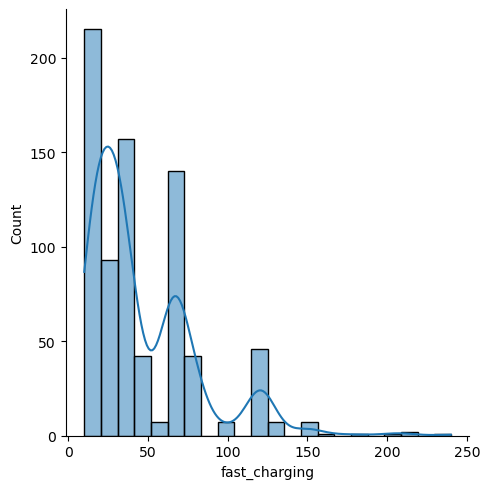

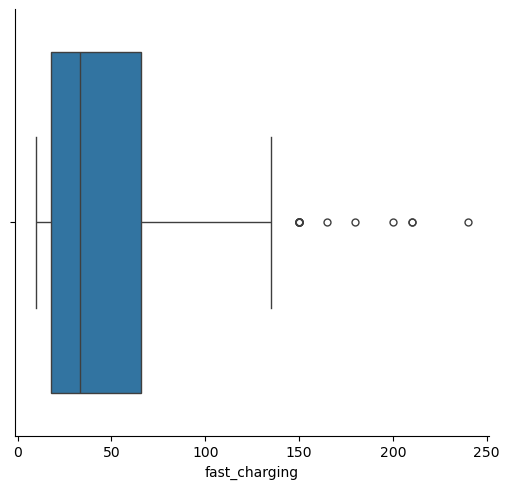

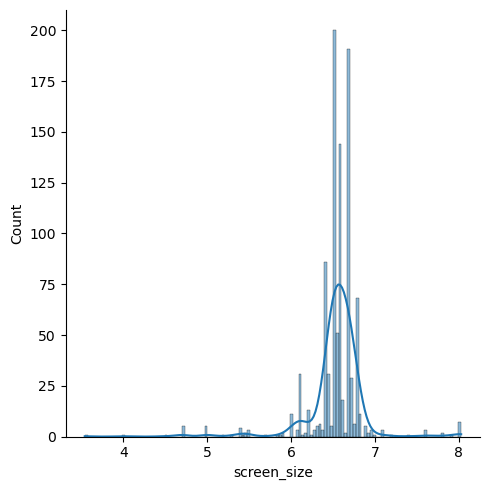

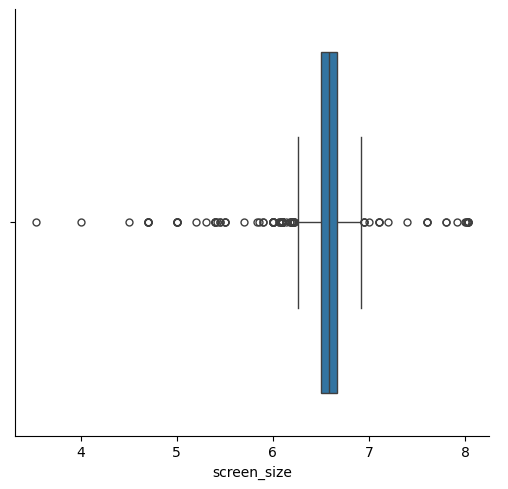

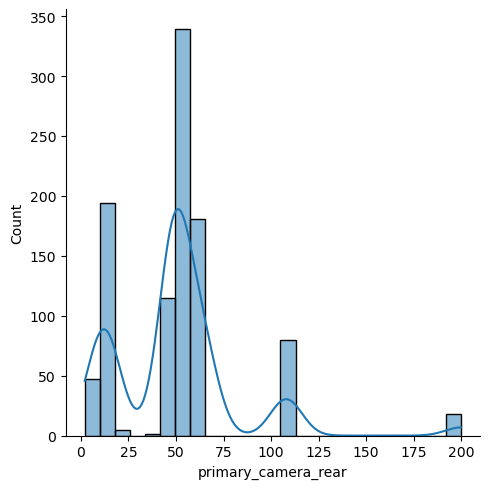

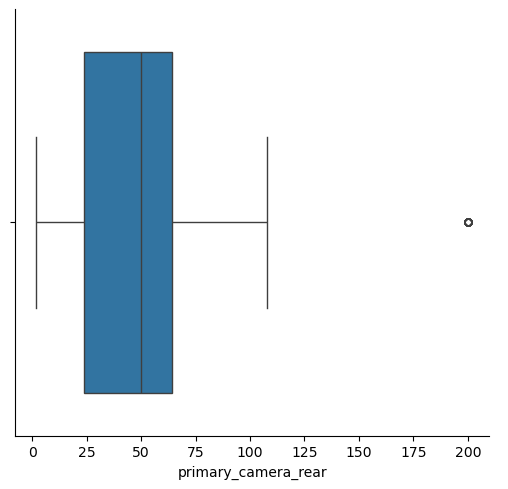

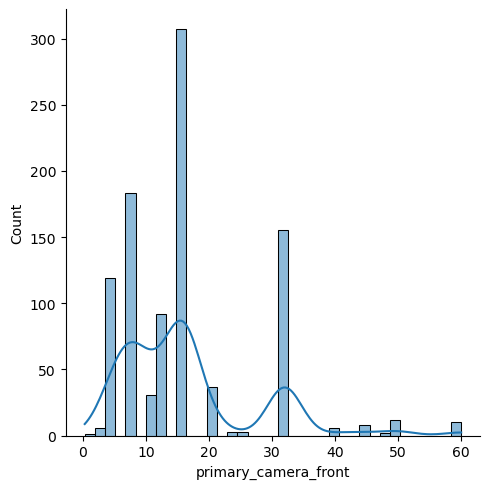

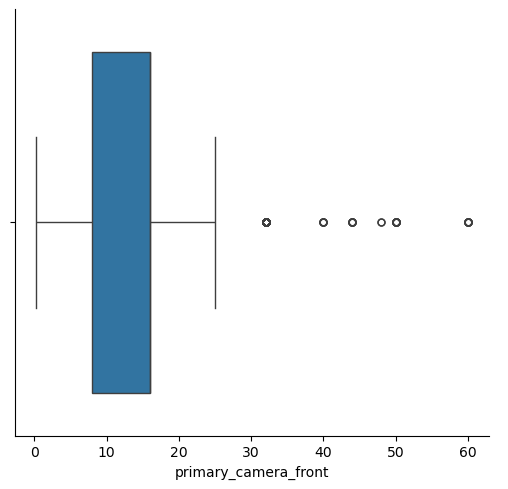

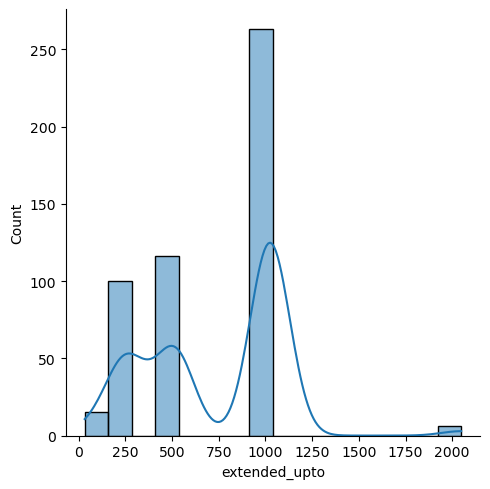

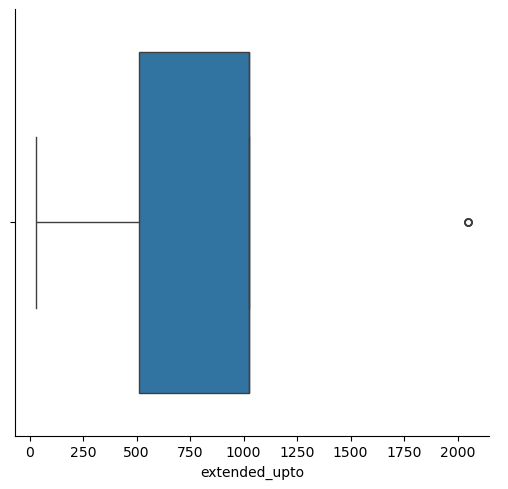

In [58]:
for col in num_columns:
    plot_graphs(col)

## Bivariate Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'royole'),
  Text(30, 0, 'so

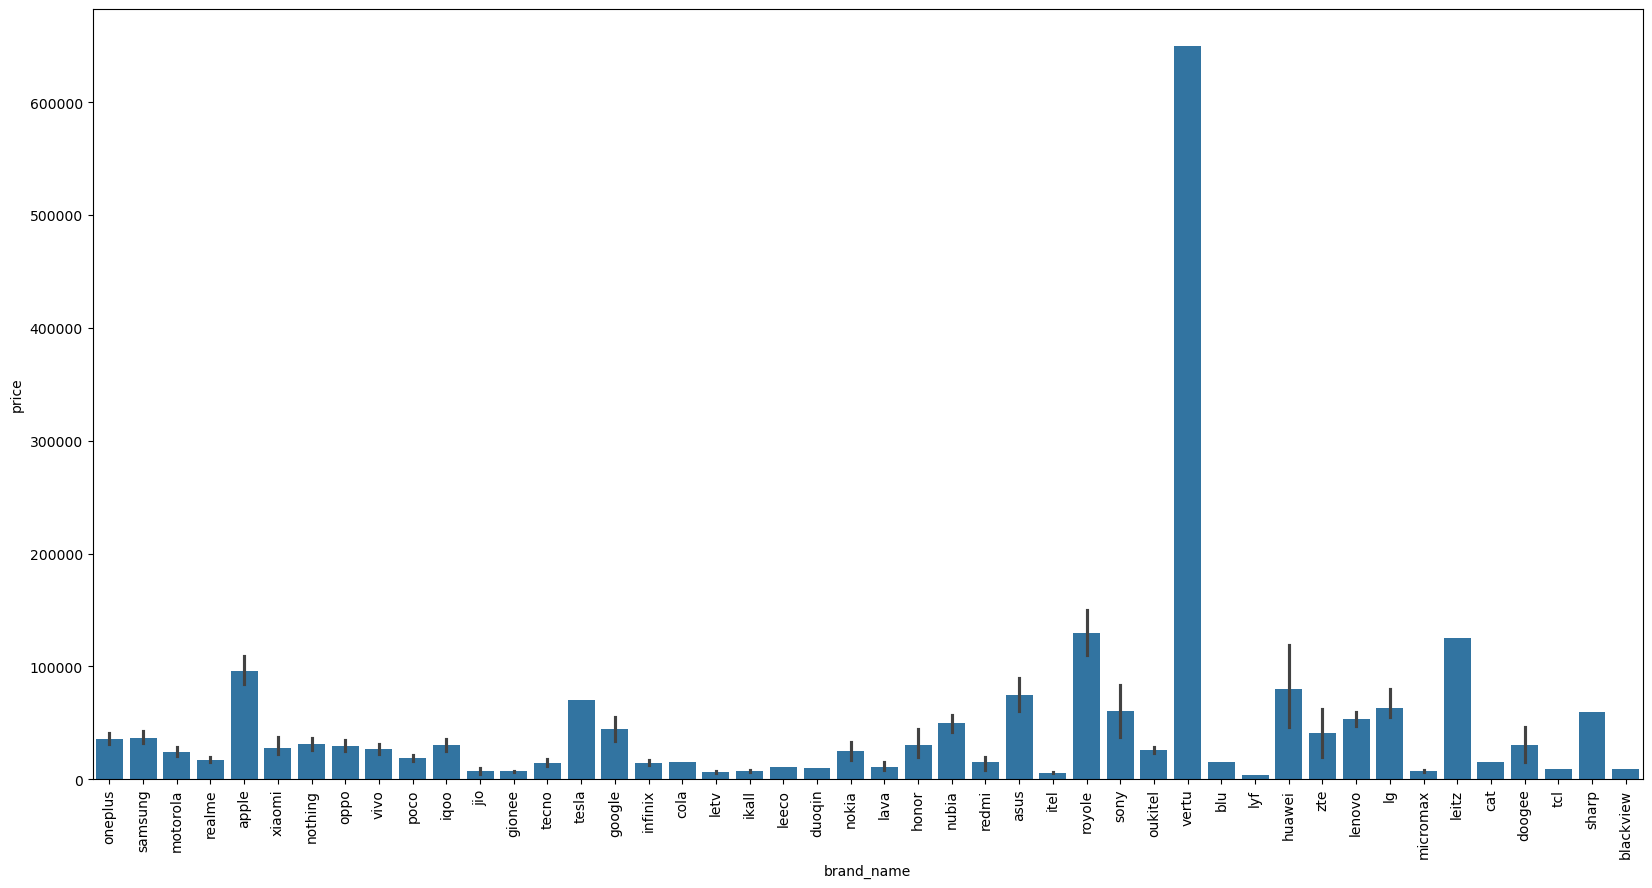

In [60]:
# price with brand_name
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [61]:
x = df.groupby('brand_name').count()['model']

In [62]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

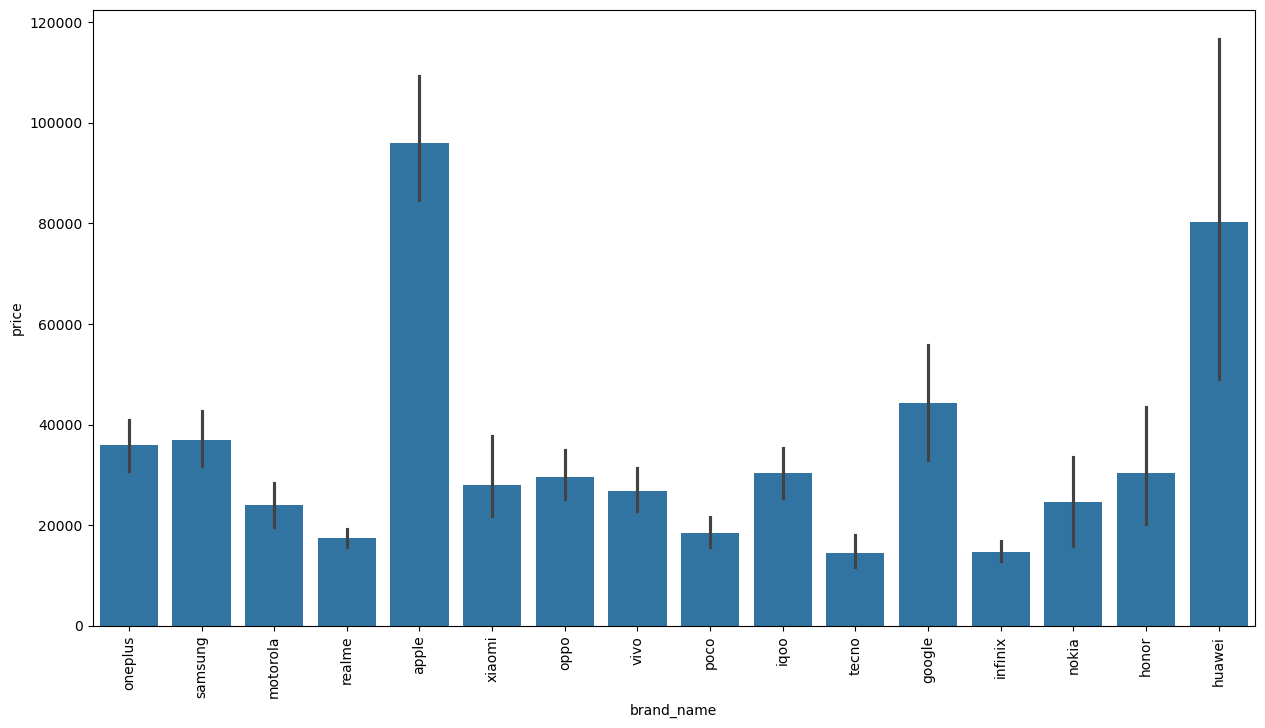

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

<Axes: xlabel='rating', ylabel='price'>

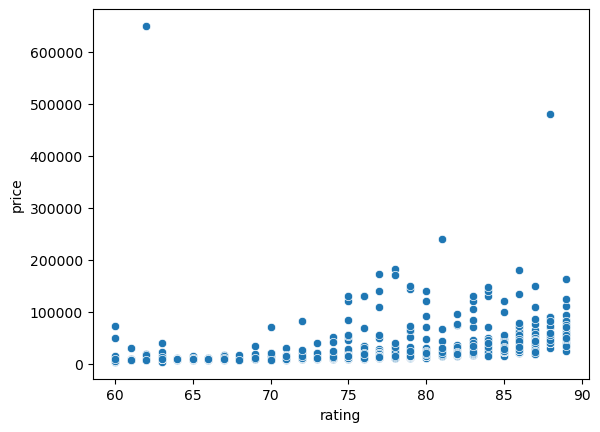

In [64]:
# price vs rating
sns.scatterplot(data=df,x='rating',y='price')

<Axes: xlabel='has_5g', ylabel='price'>

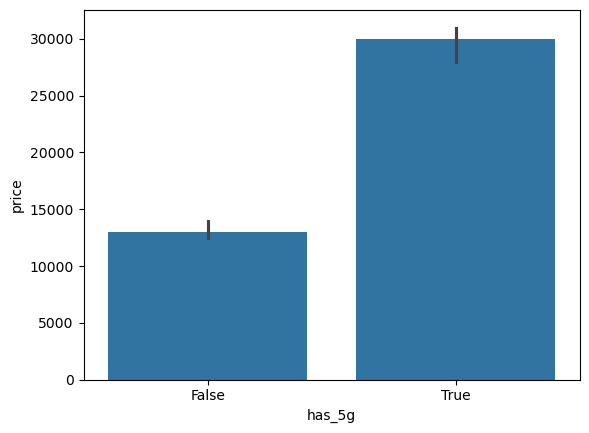

In [65]:
# price vs has_5g
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

In [66]:
# 5g phones have higher price

<Axes: xlabel='has_nfc', ylabel='price'>

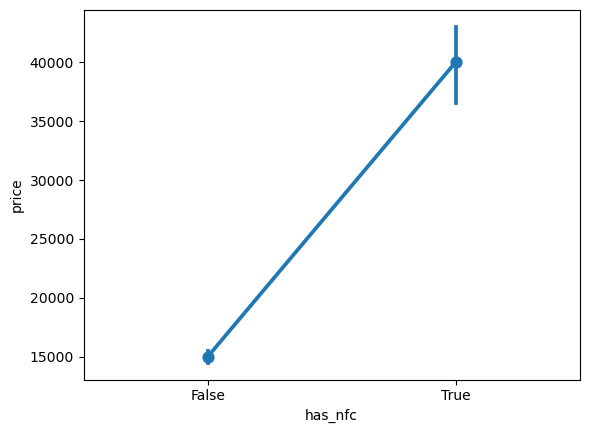

In [67]:
# price vs has_nfc
sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

In [68]:
# nfc phones have higher price

<Axes: xlabel='has_ir_blaster', ylabel='price'>

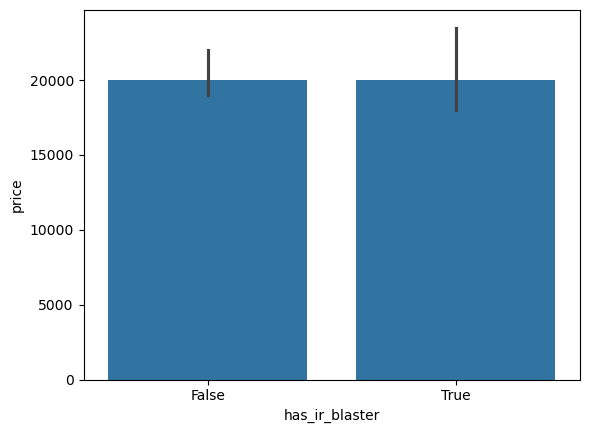

In [69]:
# price vs has_ir_blaster
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

In [70]:
# not much effect of ir_blaster on price of a smartphone

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

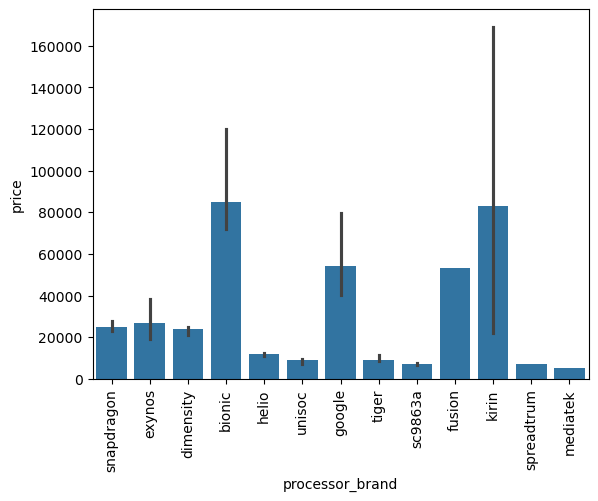

In [71]:
# processor_brand vs price
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

([0, 1, 2], [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

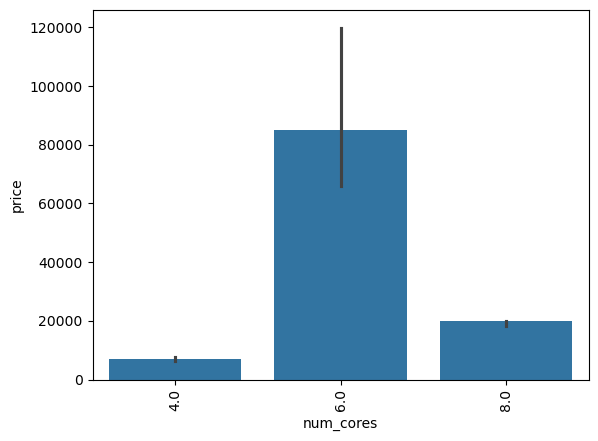

In [72]:
# num_cores vs price
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

In [73]:
# Surprisingly 6 cores is costlier than 8 cores

In [74]:
pd.crosstab(df['num_cores'],df['os'])

os         android  ios  other
num_cores                     
4.0             33    1      1
6.0              0   39      0
8.0            875    1     10

<Axes: xlabel='processor_speed', ylabel='price'>

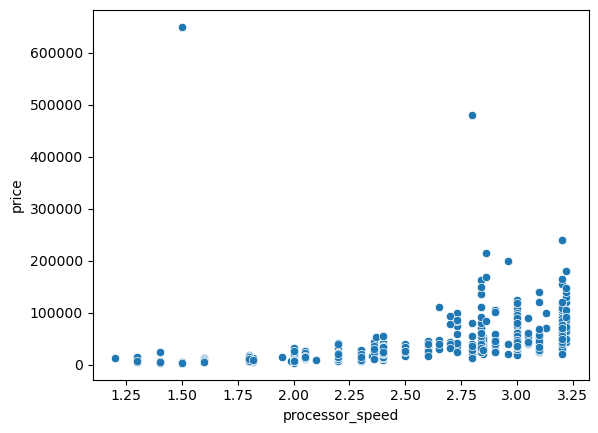

In [75]:
# price vs processor_speed
sns.scatterplot(data=df,x='processor_speed',y='price')

<Axes: xlabel='processor_speed', ylabel='price'>

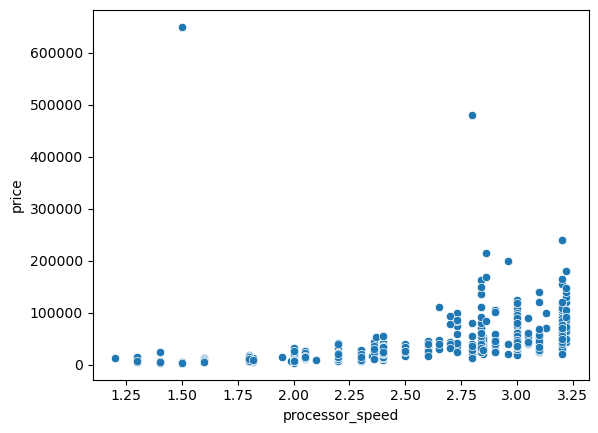

In [76]:
# price vs scree_size
sns.scatterplot(data=df,x='processor_speed',y='price')

In [77]:
df.corr(numeric_only=True) ['price']

price                        1.000000
rating                       0.283504
has_5g                       0.305066
has_nfc                      0.470951
has_ir_blaster              -0.015807
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64

<Axes: >

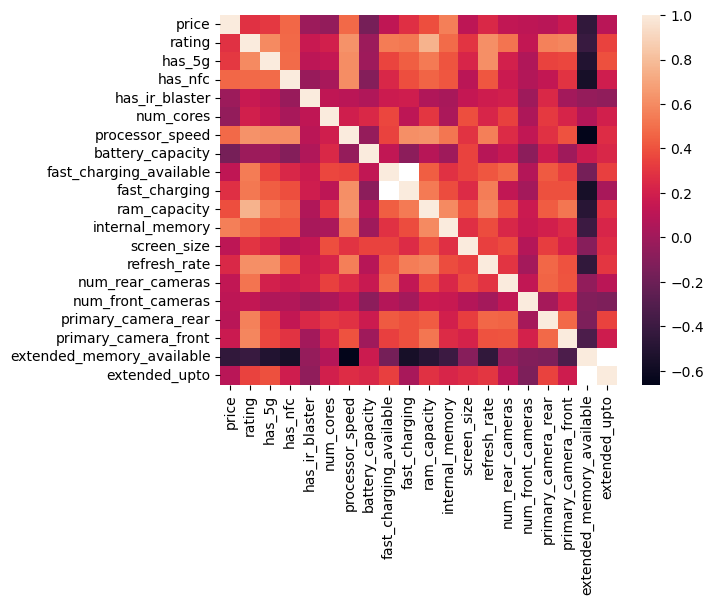

In [78]:
sns.heatmap(df.corr(numeric_only=True))

In [79]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')   #got only numeric columns

In [80]:
# Fill missing values in rating column using knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [81]:
x_df_values = imputer.fit_transform(x_df)        # it is a numpy array

In [82]:
# converting to a dataframe
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [83]:
# verify null values are filled now
x_df.isnull().sum()

rating                       0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
dtype: int64

In [84]:
# Adding price column
x_df['price'] = df['price']

In [85]:
x_df.sample()

rating  num_cores  processor_speed  battery_capacity  \
864    70.0        8.0              2.3            5000.0   

     fast_charging_available  fast_charging  ram_capacity  internal_memory  \
864                      0.0           21.0           4.0             64.0   

     screen_size  refresh_rate  num_rear_cameras  num_front_cameras  \
864          6.6          60.0               2.0                1.0   

     primary_camera_rear  primary_camera_front  extended_memory_available  \
864                 50.0                   8.0                        1.0   

     extended_upto  price  
864          665.6   7999

In [163]:
a = x_df.corr()['price'].reset_index()

In [167]:
b = df.corr(numeric_only=True)['price'].reset_index()

In [169]:
b.merge(a,on='index')

index   price_x   price_y
0                       price  1.000000  1.000000
1                      rating  0.283504  0.341727
2                   num_cores -0.048561 -0.055949
3             processor_speed  0.474049  0.488426
4            battery_capacity -0.159232 -0.166257
5     fast_charging_available  0.116739  0.116739
6               fast_charging  0.277591  0.220688
7                ram_capacity  0.386002  0.386002
8             internal_memory  0.557168  0.557168
9                 screen_size  0.113253  0.113253
10               refresh_rate  0.244115  0.244115
11           num_rear_cameras  0.125330  0.125330
12          num_front_cameras  0.115228  0.115787
13        primary_camera_rear  0.092095  0.092095
14       primary_camera_front  0.162995  0.160281
15  extended_memory_available -0.448628 -0.448628
16              extended_upto  0.091945 -0.004073

In [177]:
# One Hot Encoding
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True)

model   price  rating  \
0                                        OnePlus 11 5G   54999    89.0   
1                            OnePlus Nord CE 2 Lite 5G   19989    81.0   
2                                Samsung Galaxy A14 5G   16499    75.0   
3                                 Motorola Moto G62 5G   14999    81.0   
4                                   Realme 10 Pro Plus   24999    82.0   
5              Samsung Galaxy F23 5G (6GB RAM + 128GB)   16999    80.0   
6                                      Apple iPhone 14   65999    81.0   
7                        Xiaomi Redmi Note 12 Pro Plus   29999    86.0   
8                                      Nothing Phone 1   26749    85.0   
9                                   OnePlus Nord 2T 5G   28999    84.0   
10                                       Realme 10 Pro   18999    82.0   
11                                            Oppo A78   18999    79.0   
12                         Xiaomi Redmi Note 12 Pro 5G   24762    79.0   
13                        Vivo T1 5G (6GB RAM + 128GB)   16990    80.0   
14                         Samsung Galaxy S23 Ultra 5G  114990     NaN   
15                                     Apple iPhone 13   62999    79.0   
16                                            Vivo Y16    9999    65.0   
17                                OPPO Reno 9 Pro Plus   45999    86.0   
18                                      OnePlus 10R 5G   32999    86.0   
19                                            Vivo Y22   14499    72.0   
20                                         OnePlus 11R   39999    85.0   
21                                     Vivo V25 Pro 5G   35999    85.0   
22                                      Poco X4 Pro 5G   14999    80.0   
23                                Xiaomi Redmi Note 12   17859    76.0   
24                                        Vivo V26 Pro   42990    87.0   
25                            Samsung Galaxy S20 FE 5G   31239    88.0   
26         OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)   21995    84.0   
27                             Apple iPhone 14 Pro Max  129990    76.0   
28                                         Vivo V25 5G   27999    83.0   
29                                      OnePlus 11 Pro   69999     NaN   
30                     Realme 10 Pro (8GB RAM + 128GB)   19999    84.0   
31                                         Poco X5 Pro   20999    81.0   
32                                            Vivo V27   27990    83.0   
33                                     Apple iPhone 11   38999    73.0   
34                               Samsung Galaxy M53 5G   23790    85.0   
35                            Samsung Galaxy S21 FE 5G   39999    87.0   
36                                        Oppo Reno 8T   29990    87.0   
37                         Samsung Galaxy S22 Ultra 5G   91999     NaN   
38                     Xiaomi Redmi Note 12 Pro Max 5G   32999    83.0   
39                                      OPPO Reno 9 5G   28499    83.0   
40                                OnePlus Nord CE 3 5G   21999    83.0   
41                    Xiaomi Redmi Note 11 Pro Plus 5G   19999    83.0   
42                          Motorola Edge 20 Fusion 5G   18999    87.0   
43                Realme 10 Pro Plus (8GB RAM + 256GB)   27999    85.0   
44                                            Vivo Y35   18499    80.0   
45                               Samsung Galaxy M33 5G   17478    81.0   
46                                Xiaomi Redmi Note 11   11936    76.0   
47                                          Realme C33    8950    64.0   
48                           Vivo Y16 (4GB RAM + 64GB)   12489    68.0   
49                               Samsung Galaxy A74 5G   42999     NaN   
50             Samsung Galaxy A14 5G (6GB RAM + 128GB)   18999    79.0   
51                                       iQOO Neo 7 5G   29999    82.0   
52                                     Jio JioPhone 5G   11990    64.0   
53                                Motorola Moto G82 5